# Sequence Models for Sentiment Analysis – RNN, LSTM, GRU

## Purpose
This notebook implements deep learning sequence models to classify IMDb movie reviews as positive or negative.  
Using the preprocessed text from earlier notebooks, we will:
1. Convert text into padded sequences using Keras Tokenizer.
2. Train three architectures:
   - Simple RNN
   - LSTM (Long Short-Term Memory)
   - GRU (Gated Recurrent Unit)
3. Compare their performance against the baseline model created earlier.

## Steps
1. Load and prepare tokenized sequences.
2. Define and compile each model.
3. Train and evaluate on the test set.
4. Compare results and save the best model.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
X_train = pd.read_csv(r"F:\Projects\Sentiment Analysis\data\X_train.csv")['clean_review']
X_test = pd.read_csv(r"F:\Projects\Sentiment Analysis\data\X_test.csv")['clean_review']
y_train = pd.read_csv(r"F:\Projects\Sentiment Analysis\data\y_train.csv").squeeze()
y_test = pd.read_csv(r"F:\Projects\Sentiment Analysis\data\y_test.csv").squeeze()

In [3]:
# Tokenization
max_words = 10000
max_len = 200

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')


In [4]:
# Model function
def build_model(model_type="RNN"):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
    if model_type == "RNN":
        model.add(SimpleRNN(64))
    elif model_type == "LSTM":
        model.add(LSTM(64))
    elif model_type == "GRU":
        model.add(GRU(64))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [5]:
# Training loop for all models
results = {}
for m_type in ["RNN", "LSTM", "GRU"]:
    print(f"\nTraining {m_type} Model")
    model = build_model(m_type)
    es = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
    history = model.fit(
        X_train_pad, y_train,
        validation_data=(X_test_pad, y_test),
        epochs=5,
        batch_size=128,
        callbacks=[es],
        verbose=1
    )
    y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")
    acc = accuracy_score(y_test, y_pred)
    results[m_type] = acc
    print(f"{m_type} Accuracy: {acc}")
    model.save(f"F:/Projects/Sentiment Analysis/models/{m_type}_model.h5")



Training RNN Model


f:\Projects\Sentiment Analysis\imdb-sentiment-rnn-env\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 37s 101ms/step - accuracy: 0.5051 - loss: 0.6983 - val_accuracy: 0.4994 - val_loss: 0.6927
Epoch 2/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 26s 82ms/step - accuracy: 0.5440 - loss: 0.6804 - val_accuracy: 0.5011 - val_loss: 0.6954
Epoch 3/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step - accuracy: 0.5726 - loss: 0.6472 - val_accuracy: 0.5019 - val_loss: 0.7141
310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


RNN Accuracy: 0.4994453967933851

Training LSTM Model
Epoch 1/5


f:\Projects\Sentiment Analysis\imdb-sentiment-rnn-env\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


310/310 ━━━━━━━━━━━━━━━━━━━━ 59s 180ms/step - accuracy: 0.5057 - loss: 0.6934 - val_accuracy: 0.5094 - val_loss: 0.6922
Epoch 2/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 55s 177ms/step - accuracy: 0.5250 - loss: 0.6946 - val_accuracy: 0.5114 - val_loss: 0.6912
Epoch 3/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 62s 201ms/step - accuracy: 0.5398 - loss: 0.6667 - val_accuracy: 0.5293 - val_loss: 0.6824
Epoch 4/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 58s 187ms/step - accuracy: 0.6149 - loss: 0.6142 - val_accuracy: 0.6553 - val_loss: 0.6100
Epoch 5/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 58s 185ms/step - accuracy: 0.6934 - loss: 0.5674 - val_accuracy: 0.8454 - val_loss: 0.3863
310/310 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step


LSTM Accuracy: 0.8454169607744277

Training GRU Model
Epoch 1/5


f:\Projects\Sentiment Analysis\imdb-sentiment-rnn-env\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


310/310 ━━━━━━━━━━━━━━━━━━━━ 52s 162ms/step - accuracy: 0.5027 - loss: 0.6935 - val_accuracy: 0.5142 - val_loss: 0.6916
Epoch 2/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 57s 184ms/step - accuracy: 0.5294 - loss: 0.6854 - val_accuracy: 0.5156 - val_loss: 0.6849
Epoch 3/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 60s 193ms/step - accuracy: 0.5761 - loss: 0.6457 - val_accuracy: 0.8541 - val_loss: 0.3549
Epoch 4/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 57s 184ms/step - accuracy: 0.8924 - loss: 0.2817 - val_accuracy: 0.8833 - val_loss: 0.2799
Epoch 5/5
310/310 ━━━━━━━━━━━━━━━━━━━━ 59s 191ms/step - accuracy: 0.9388 - loss: 0.1733 - val_accuracy: 0.8846 - val_loss: 0.2950
310/310 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step


GRU Accuracy: 0.8833316527175558



Model Comparison: {'RNN': 0.4994453967933851, 'LSTM': 0.8454169607744277, 'GRU': 0.8833316527175558}


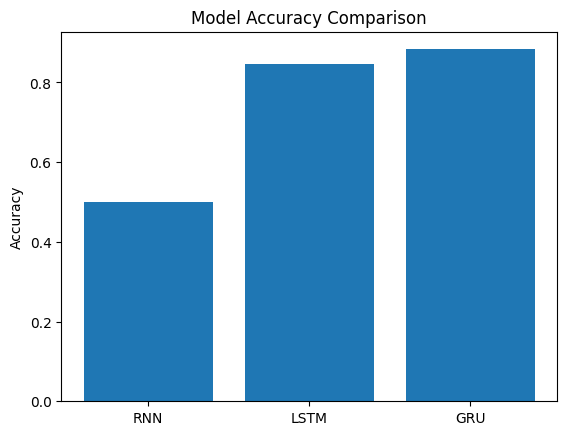

In [6]:
# Compare results
print("\nModel Comparison:", results)
plt.bar(results.keys(), results.values())
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()